In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [2]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

# Reading filtered experiment

In [3]:
for FGR in ['1.0', '1.5', '2.0', '2.5', '3.0']:
    ds.remesh('R64', 'R4', f'R64_R4_FGR{FGR}', operator= lambda x,y: gaussian_remesh(x,y,FGR=float(FGR)))
    for file in [f'/scratch/pp2681/mom6/Double-Gyre-offline/R64_R4_FGR{FGR}-part1.nc', f'/scratch/pp2681/mom6/Double-Gyre-offline/R64_R4_FGR{FGR}-part2.nc']:
        pass
        dataset = xr.open_dataset(file, decode_times=False)
        for key in dataset.keys():
            setattr(ds[f'R64_R4_FGR{FGR}'], key, dataset[key])

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR1.0
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR1.5
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR2.0
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR2.5
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR3.0


In [6]:
ref = ds['R64_R4_FGR2.5']
Smagorinsky_offline = ref.transfer(*ref.Smagorinsky(Cs=0.06)).compute()
JH15_offline = ref.transfer(*ref.JansenHeld(Cs=0.06,ratio=1)).compute()

In [7]:
def compensated(sp):
    return sp * sp.freq_r

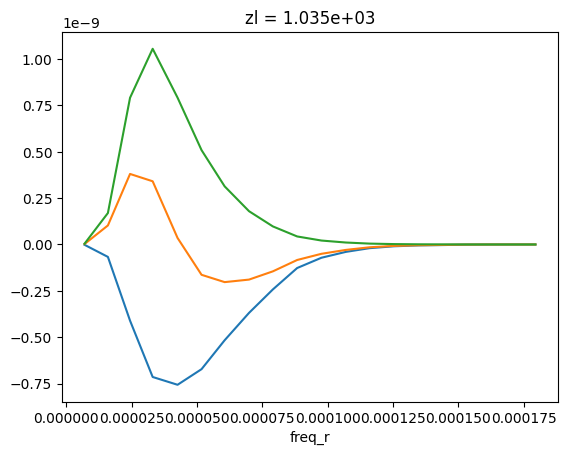

In [13]:
compensated(Smagorinsky_offline).isel(zl=0).plot()
compensated(JH15_offline).isel(zl=0).plot()
compensated(JH15_offline-Smagorinsky_offline).isel(zl=0).plot()
compensated(JH15_offline-Smagorinsky_offline).isel(zl=0).plot()